In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_participants = 10
num_trials = 20

In [2]:
# Read and concatenate data for Group 0
group0_data = pd.concat([pd.read_csv('../group0/{}{}.csv'.format(0, i+1)).assign(Participant=i+1) for i in range(num_participants)], axis=0)

# Read and concatenate data for Group 1
group1_data = pd.concat([pd.read_csv('../group1/{}{}.csv'.format(1, i+1)).assign(Participant=i+1) for i in range(num_participants)], axis=0)

# Detect and print outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Identify outliers for each group
group0_outliers = detect_outliers(group0_data['Response Time (s)'])
group1_outliers = detect_outliers(group1_data['Response Time (s)'])
# Remove outliers from the original datasets
group0_no_outliers = group0_data[~group0_data['Response Time (s)'].isin(group0_outliers.values)]
group1_no_outliers = group1_data[~group1_data['Response Time (s)'].isin(group1_outliers.values)]


In [3]:
# Read and concatenate data for Group 2
group2_data = pd.concat([pd.read_csv('../group2/{}{}.csv'.format(2, i+1)).assign(Participant=i+1) for i in range(num_participants)], axis=0)

# Read and concatenate data for Group 3
group3_data = pd.concat([pd.read_csv('../group3/{}{}.csv'.format(3, i+1)).assign(Participant=i+1) for i in range(num_participants)], axis=0)

# Detect and print outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Identify outliers for each group
group2_outliers = detect_outliers(group2_data['Response Time (s)'])
group3_outliers = detect_outliers(group3_data['Response Time (s)'])
# Remove outliers from the original datasets
group2_no_outliers = group2_data[~group2_data['Response Time (s)'].isin(group2_outliers.values)]
group3_no_outliers = group3_data[~group3_data['Response Time (s)'].isin(group3_outliers.values)]


In [4]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(group0_data['Response Time (s)'], group1_data['Response Time (s)'])

print(stat)
print(p_value)

1823.0
1.0745205999142703e-55


In [5]:

from scipy.stats import mannwhitneyu
import numpy as np
# Extract response times for each group without outliers
response_times_group0 = group0_no_outliers['Response Time (s)']
response_times_group1 = group1_no_outliers['Response Time (s)']
response_times_group2 = group2_no_outliers['Response Time (s)']
response_times_group3 = group3_no_outliers['Response Time (s)']
# Calculate the difference in response times between Group 0 and Group 1
difference_01 = response_times_group1 - response_times_group0

# Calculate the difference in response times between Group 2 and Group 3
difference_23 = response_times_group3 - response_times_group2

# Calculate medians of the differences for Simple Stroop and Complex Stroop
median_simple = np.median(difference_01)
median_complex = np.median(difference_23)

# Perform Mann-Whitney U Test for the differences
mannwhitney_stat_diff, mannwhitney_pvalue_diff = mannwhitneyu(difference_01, difference_23)
print("Mann-Whitney U Test for the difference between Group 0-1 vs Group 2-3:")
print(f"Mann-Whitney U statistic = {mannwhitney_stat_diff:.4f}")
print(f"P-value = {mannwhitney_pvalue_diff}")


Mann-Whitney U Test for the difference between Group 0-1 vs Group 2-3:
Mann-Whitney U statistic = 1469787.5000
P-value = 4.949111269234074e-14


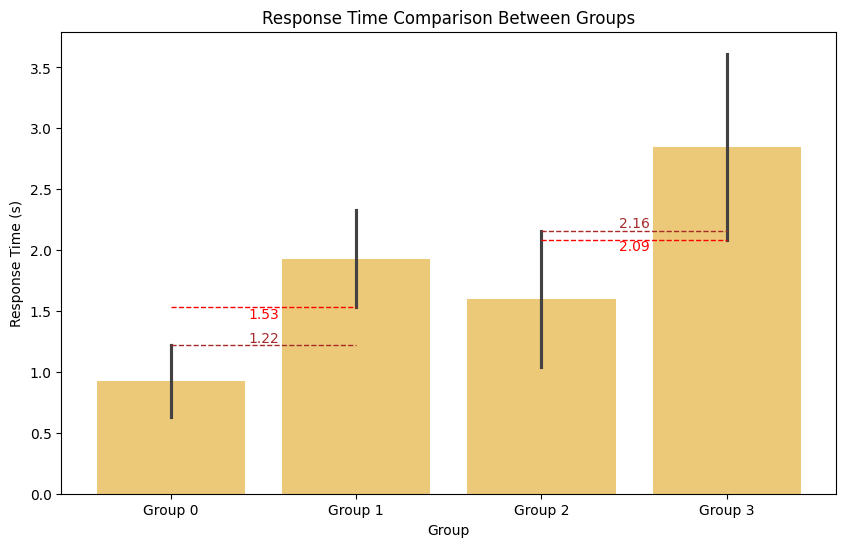

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming group0_no_outliers, group1_no_outliers, group2_no_outliers, and group3_no_outliers are your dataframes

# Create a combined dataframe for easier plotting
combined_no_outliers = pd.concat([
    group0_no_outliers.assign(Group='Group 0'),
    group1_no_outliers.assign(Group='Group 1'),
    group2_no_outliers.assign(Group='Group 2'),
    group3_no_outliers.assign(Group='Group 3')
])

# Plotting
plt.figure(figsize=(10, 6))
# Define a custom color palette in hex values
custom_palette = ["#FFD166", "#FF5B00", "#8C401A", "#593E1A"]

# Set the custom palette
sns.set_palette(custom_palette)
ax = sns.barplot(x='Group', y='Response Time (s)', data=combined_no_outliers, errorbar='sd')

for i, group_name in enumerate(combined_no_outliers['Group'].unique()):
    group_mean = combined_no_outliers.loc[combined_no_outliers['Group'] == group_name, 'Response Time (s)'].mean()
    group_std = combined_no_outliers.loc[combined_no_outliers['Group'] == group_name, 'Response Time (s)'].std()

    if '0' in group_name or '2' in group_name:
        # Add upper limit line to Group 0 and Group 2
        upper_limit = group_mean + group_std
        plt.hlines(upper_limit, i, i + 1, color='brown', linestyle='--', linewidth=1)
        plt.text(i + 0.5, upper_limit, f'{upper_limit:.2f}', color='brown', ha='center', va='bottom')
    else:
        # Add lower limit line to Group 1 and Group 3
        lower_limit = group_mean - group_std
        plt.hlines(lower_limit, i - 1, i, color='red', linestyle='--', linewidth=1)
        plt.text(i - 0.5, lower_limit, f'{lower_limit:.2f}', color='red', ha='center', va='top')

plt.title('Response Time Comparison Between Groups')
plt.xlabel('Group')
plt.ylabel('Response Time (s)')
plt.show()


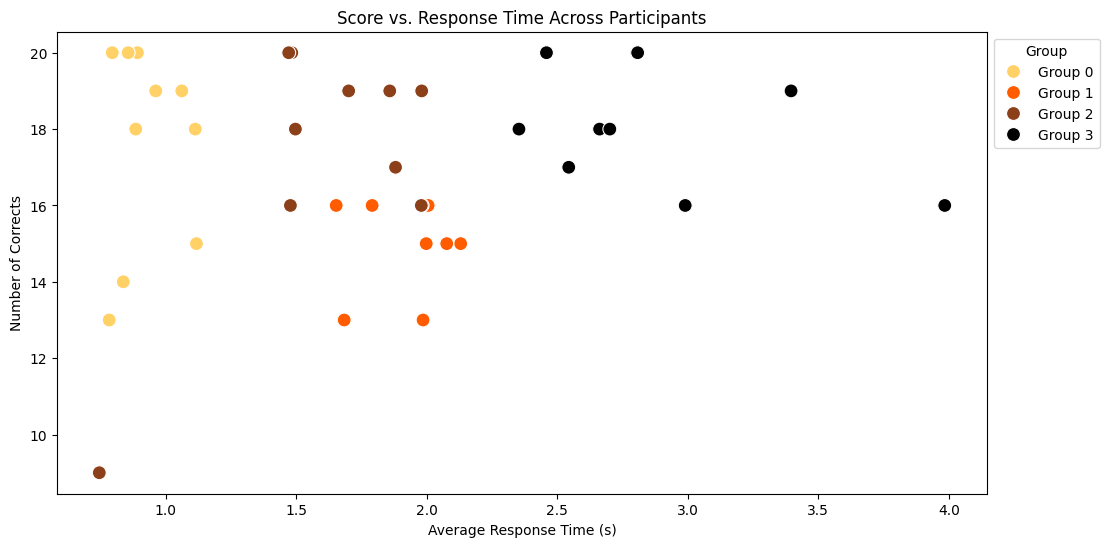

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt



# Convert 'Response Time (s)' and 'Corrects' to numeric
combined_no_outliers['Response Time (s)'] = pd.to_numeric(combined_no_outliers['Response Time (s)'], errors='coerce')
combined_no_outliers['Corrects'] = pd.to_numeric(combined_no_outliers['Correct'], errors='coerce')

# Calculate average response time and number of corrects for each participant
average_no_outliers = combined_no_outliers.groupby(['Group', 'Participant']).agg({
    'Response Time (s)': 'mean',
    'Corrects': 'sum'
}).reset_index()

# Plotting score vs. time graph
plt.figure(figsize=(12, 6))
# Define a custom color palette in hex values
custom_palette = ["#FFD166", "#FF5B00", "#8C401A", "#000000"]

# Set the custom palette
sns.set_palette(custom_palette)
sns.scatterplot(x='Response Time (s)', y='Corrects', hue='Group', marker='o', data=average_no_outliers, s=100)

plt.title('Score vs. Response Time Across Participants')
plt.xlabel('Average Response Time (s)')
plt.ylabel('Number of Corrects')
plt.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


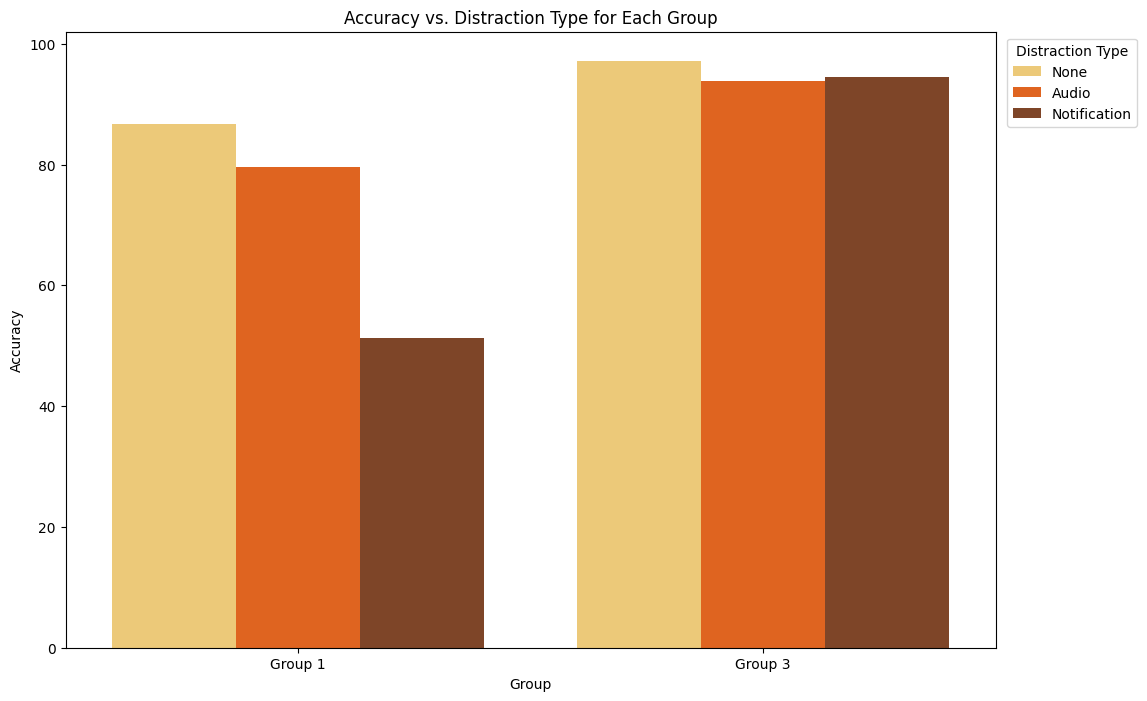

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate dataframes for all groups
combined_distracted_data = pd.concat([
    group1_no_outliers.assign(Group='Group 1'),
    group3_no_outliers.assign(Group='Group 3')
])
# Replace null values in 'Distraction Type' with 'None'
combined_distracted_data['Distraction Type'] = combined_distracted_data['Distraction Type'].fillna('None')

# Set the order of 'Distraction Type' for the 'hue' parameter
hue_order = ['None', 'Audio', 'Notification']

# Filter data for correct trials (you can adjust this based on your criteria)
correct_trials = combined_distracted_data[combined_distracted_data['Correct'] == 1]

# Group by 'Distraction Type' and 'Group' and calculate the percentage of correct responses
percentage_correct = correct_trials.groupby(['Distraction Type', 'Group']).size() / combined_distracted_data.groupby(['Distraction Type', 'Group']).size() * 100
percentage_correct = percentage_correct.reset_index(name='Accuracy')

# Plotting with seaborn
plt.figure(figsize=(12, 8))
# Define a custom color palette in hex values
custom_palette = ["#FFD166", "#FF5B00", "#8C401A", "#000000"]

# Set the custom palette
sns.set_palette(custom_palette)
sns.barplot(x='Group', y='Accuracy', hue='Distraction Type', data=percentage_correct, hue_order=hue_order)

# Adding labels
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Distraction Type for Each Group')

# Move legend outside the plot
plt.legend(title='Distraction Type', bbox_to_anchor=(1.005, 1), loc='upper left')

# Show plot
plt.show()
